<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/5_4_dramareview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Colab에 Mecab 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1==0.7.0
!pip3 install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/multiv

In [2]:
# Colab에 Mecab 설치
!pip install konlpy
!pip install mecab-python
!pip install --upgrade matplotlib

!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip3 install JPype1==0.7.0
!pip3 install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# 필요한 라이브러리와 모듈을 import
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 불러오기

total_data = pd.read_csv('./dramareview.csv', names=['reviews', 'ratings'])
print('전체 리뷰 개수 :', len(total_data))  # 전체 리뷰 개수 출력
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # reviews 열에서 중복인 내용이 있다면 중복 제거

# Use the 'reviews' column as features and 'label' column as labels
train_data = total_data['reviews']
train_labels = total_data['label']

# Tokenizer를 사용하여 텍스트 데이터를 숫자로 변환
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data)
train_sequences = tokenizer.texts_to_sequences(train_data)
train_data = pad_sequences(train_sequences)

# 모델 정의
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# 모델 컴파일
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# 원본 모델 학습
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1231 sha256=9643704345545ca80538c2e2e63c21694c6a74170fe28bc559e6e39904288d95
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 29.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which 

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted,

In [3]:
# 작은 모델 정의
model = keras.Sequential([
    layers.Dense(4,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(1,activation="sigmoid")])
# 작은 모델 컴파일
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# 작은 모델 학습
history_smaller_model =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
1/1 [==============================] - 1s 708ms/step - loss: 29.3784 - accuracy: 0.5571 - val_loss: 36.1454 - val_accuracy: 0.5319
Epoch 2/20
1/1 [==============================] - 0s 33ms/step - loss: 15.2012 - accuracy: 0.6000 - val_loss: 33.9096 - val_accuracy: 0.5106
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: 10.3525 - accuracy: 0.5857 - val_loss: 32.1729 - val_accuracy: 0.4894
Epoch 4/20
1/1 [==============================] - 0s 32ms/step - loss: 8.2771 - accuracy: 0.6286 - val_loss: 30.1268 - val_accuracy: 0.4681
Epoch 5/20
1/1 [==============================] - 0s 30ms/step - loss: 7.5322 - accuracy: 0.6143 - val_loss: 30.0346 - val_accuracy: 0.4894
Epoch 6/20
1/1 [==============================] - 0s 33ms/step - loss: 6.5765 - accuracy: 0.6429 - val_loss: 26.8173 - val_accuracy: 0.4894
Epoch 7/20
1/1 [==============================] - 0s 32ms/step - loss: 6.1755 - accuracy: 0.6429 - val_loss: 27.5258 - val_accuracy: 0.4894
Epoch 8/20
1/1 [

In [4]:
# 큰 모델 정의
model = keras.Sequential([
    layers.Dense(512,activation="relu"),
    layers.Dense(512,activation="relu"),
    layers.Dense(1,activation="sigmoid")])
# 큰 모델 컴파일
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# 큰 모델 학습
history_larger_model =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
1/1 [==============================] - 1s 725ms/step - loss: 104.0886 - accuracy: 0.4286 - val_loss: 993.3922 - val_accuracy: 0.5532
Epoch 2/20
1/1 [==============================] - 0s 43ms/step - loss: 570.5283 - accuracy: 0.5714 - val_loss: 273.2514 - val_accuracy: 0.5532
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 150.4259 - accuracy: 0.5714 - val_loss: 23.9436 - val_accuracy: 0.5319
Epoch 4/20
1/1 [==============================] - 0s 40ms/step - loss: 6.3112 - accuracy: 0.7714 - val_loss: 77.9679 - val_accuracy: 0.4468
Epoch 5/20
1/1 [==============================] - 0s 39ms/step - loss: 31.6255 - accuracy: 0.4571 - val_loss: 197.2515 - val_accuracy: 0.5532
Epoch 6/20
1/1 [==============================] - 0s 45ms/step - loss: 77.2071 - accuracy: 0.5714 - val_loss: 30.6443 - val_accuracy: 0.4681
Epoch 7/20
1/1 [==============================] - 0s 42ms/step - loss: 2.0663 - accuracy: 0.8714 - val_loss: 26.8016 - val_accuracy: 0.4468
Epoch 8/

In [5]:
from tensorflow.keras import regularizers
# L2 규제 적용한 모델 정의
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),activation="relu"),
    layers.Dense(1,activation="sigmoid")])
# L2 규제 적용한 모델 컴파일
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",metrics=["accuracy"])
# L2 규제 적용한 모델 학습
history_l2_reg =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)

Epoch 1/20
1/1 [==============================] - 1s 747ms/step - loss: 19.5148 - accuracy: 0.5143 - val_loss: 27.4594 - val_accuracy: 0.5532
Epoch 2/20
1/1 [==============================] - 0s 35ms/step - loss: 11.4110 - accuracy: 0.5286 - val_loss: 26.1931 - val_accuracy: 0.4681
Epoch 3/20
1/1 [==============================] - 0s 32ms/step - loss: 7.7592 - accuracy: 0.6286 - val_loss: 25.9146 - val_accuracy: 0.4894
Epoch 4/20
1/1 [==============================] - 0s 29ms/step - loss: 7.4646 - accuracy: 0.6000 - val_loss: 24.0251 - val_accuracy: 0.4255
Epoch 5/20
1/1 [==============================] - 0s 31ms/step - loss: 5.8257 - accuracy: 0.6714 - val_loss: 23.2634 - val_accuracy: 0.4894
Epoch 6/20
1/1 [==============================] - 0s 31ms/step - loss: 4.9131 - accuracy: 0.6857 - val_loss: 22.6486 - val_accuracy: 0.4468
Epoch 7/20
1/1 [==============================] - 0s 29ms/step - loss: 4.4297 - accuracy: 0.7143 - val_loss: 21.8133 - val_accuracy: 0.4468
Epoch 8/20
1/1 [=

In [6]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001,l2=0.001)

In [22]:
# Dropout 적용한 모델 정의
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1,activation="sigmoid")])
# Dropout 적용한 모델 컴파일
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# Dropout 적용한 모델 학습
history_dropout =model.fit(
    train_data, train_labels,
    epochs=20,batch_size=512,validation_split=0.4)
# dropout을 하는 이유는 과대적합 방지

Epoch 1/20
1/1 [==============================] - 1s 841ms/step - loss: 62.0648 - accuracy: 0.5857 - val_loss: 38.5531 - val_accuracy: 0.5106
Epoch 2/20
1/1 [==============================] - 0s 30ms/step - loss: 66.6217 - accuracy: 0.4714 - val_loss: 33.9062 - val_accuracy: 0.4894
Epoch 3/20
1/1 [==============================] - 0s 29ms/step - loss: 49.4118 - accuracy: 0.5714 - val_loss: 33.9620 - val_accuracy: 0.4894
Epoch 4/20
1/1 [==============================] - 0s 32ms/step - loss: 41.1116 - accuracy: 0.6000 - val_loss: 31.1101 - val_accuracy: 0.4894
Epoch 5/20
1/1 [==============================] - 0s 33ms/step - loss: 42.4974 - accuracy: 0.5714 - val_loss: 28.8748 - val_accuracy: 0.5106
Epoch 6/20
1/1 [==============================] - 0s 35ms/step - loss: 54.2068 - accuracy: 0.5714 - val_loss: 28.9850 - val_accuracy: 0.4894
Epoch 7/20
1/1 [==============================] - 0s 31ms/step - loss: 49.8275 - accuracy: 0.4714 - val_loss: 28.1420 - val_accuracy: 0.4681
Epoch 8/20
1

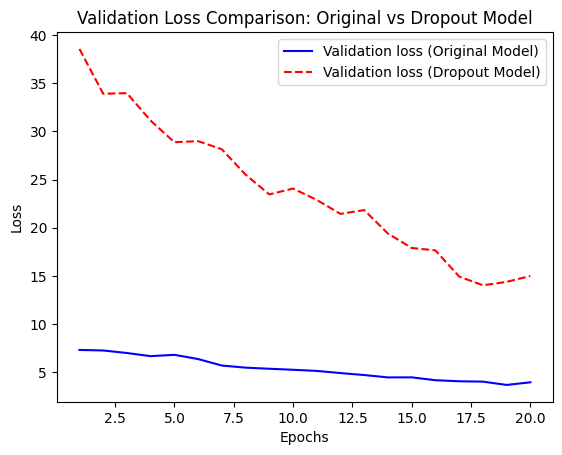

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
# 원본 모델과 Dropout 적용한 모델의 Validation Loss 비교
plt.plot(epochs, history_original.history['val_loss'], 'b-', label='Validation loss (Original Model)')
plt.plot(epochs, history_dropout.history['val_loss'], 'r--', label='Validation loss (Dropout Model)')
plt.title('Validation Loss Comparison: Original vs Dropout Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Epoch 1/20
1/1 [==============================] - 0s 93ms/step - loss: 35.6460 - accuracy: 0.4571 - val_loss: 15.8930 - val_accuracy: 0.4894
Epoch 2/20
1/1 [==============================] - 0s 40ms/step - loss: 27.4588 - accuracy: 0.5714 - val_loss: 14.9910 - val_accuracy: 0.4681
Epoch 3/20
1/1 [==============================] - 0s 40ms/step - loss: 12.3598 - accuracy: 0.5286 - val_loss: 14.1296 - val_accuracy: 0.4681
Epoch 4/20
1/1 [==============================] - 0s 41ms/step - loss: 20.0761 - accuracy: 0.5714 - val_loss: 14.4803 - val_accuracy: 0.5106
Epoch 5/20
1/1 [==============================] - 0s 47ms/step - loss: 24.4366 - accuracy: 0.5571 - val_loss: 15.2780 - val_accuracy: 0.5106
Epoch 6/20
1/1 [==============================] - 0s 52ms/step - loss: 15.5248 - accuracy: 0.6429 - val_loss: 14.6045 - val_accuracy: 0.4894
Epoch 7/20
1/1 [==============================] - 0s 40ms/step - loss: 15.3856 - accuracy: 0.6571 - val_loss: 14.6728 - val_accuracy: 0.5106
Epoch 8/20
1/

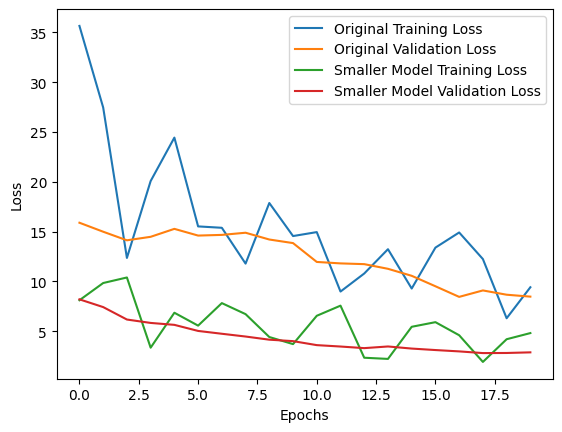

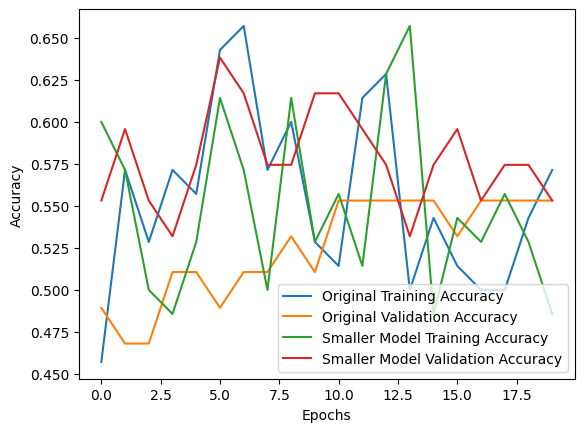

In [25]:
import matplotlib.pyplot as plt

# Original model training
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# Smaller model training
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

# Plot training and validation loss
plt.plot(history_original.history['loss'], label='Original Training Loss')
plt.plot(history_original.history['val_loss'], label='Original Validation Loss')
plt.plot(history_smaller_model.history['loss'], label='Smaller Model Training Loss')
plt.plot(history_smaller_model.history['val_loss'], label='Smaller Model Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history_original.history['accuracy'], label='Original Training Accuracy')
plt.plot(history_original.history['val_accuracy'], label='Original Validation Accuracy')
plt.plot(history_smaller_model.history['accuracy'], label='Smaller Model Training Accuracy')
plt.plot(history_smaller_model.history['val_accuracy'], label='Smaller Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
